# Quantum Chemistry Systems

In [1]:
## import necessary packages
import numpy as np
from cmath import cos, sin, exp, pi, sqrt
from numpy.linalg import matrix_power
from scipy.linalg import expm

import matplotlib.pyplot as plt

# import utils as utils
from utils import *
from fermion_ham import *
%config InlineBackend.figure_format = 'retina'

from openfermion import MolecularData
from openfermion.transforms import get_fermion_operator, jordan_wigner
from openfermion.linalg import get_ground_state, get_sparse_operator


## H2O

In [2]:
h2o = h2o_hamiltonian(verbose=False)

print('====start Trotter====')
t = 10
epsilon = 1e-3
n_perm = 2
error_list_pf1, error_list_pf2 = zip(sparse_trotter_error(h2o.qubit_terms, r=100, t=t), sparse_trotter_error(h2o.qubit_terms, r=10000, t=t))

=====Using active space=====


====start Trotter====
-------sparse_trotter_error--------


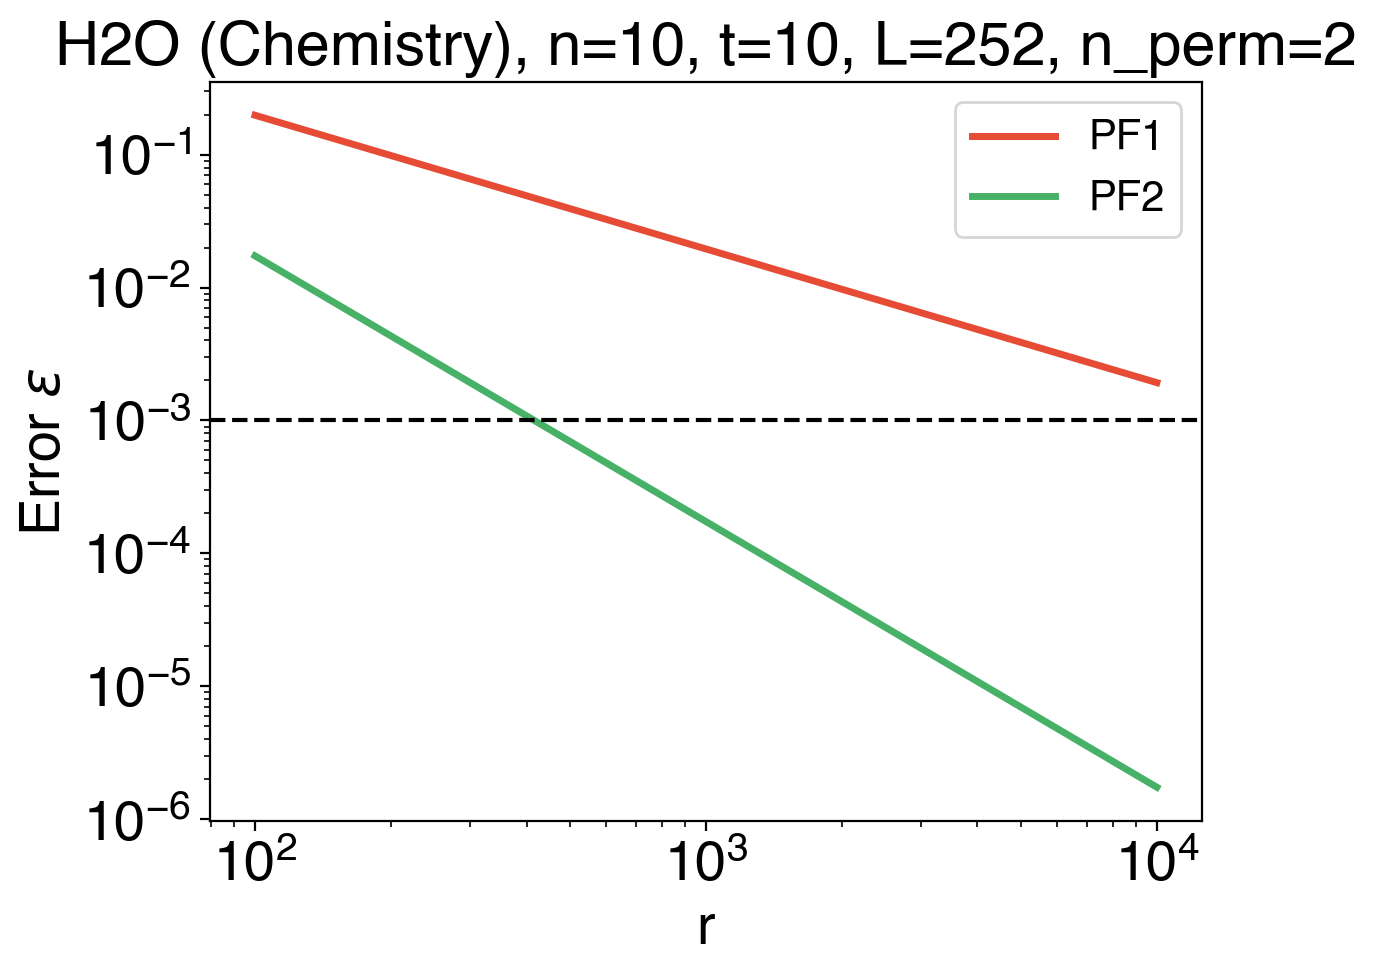

In [6]:
r_list = [100, 10000]
data_plot(r_list, error_list_pf1, '-', label='PF1', linewidth=2.5)
data_plot(r_list, error_list_pf2, '-', label='PF2', linewidth=2.5)
plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'Error $\epsilon$')
plt.legend()
plt.title(f'H2O (Chemistry), n={t}, t={t}, L={len(h2o.qubit_terms)}, n_perm={n_perm}')
plt.savefig(f'../figs/h2o_sparse_{n_perm}_{len(h2o.qubit_terms)}.pdf', dpi=300, bbox_inches='tight')

## Hydrogen chain

# pstr: 15, ['IIII', 'ZIII', 'IZII', 'IIZI', 'IIIZ', 'ZZII', 'YXXY', 'YYXX', 'XXYY', 'XYYX', 'ZIZI', 'ZIIZ', 'IZZI', 'IZIZ', 'IIZZ']
# groups: 2
[[{'IIII': (-0.3276081896748102+0j)}, {'ZIII': (0.13716572937099497+0j)}, {'IZII': (0.13716572937099497+0j)}, {'IIZI': (-0.13036292057109025+0j)}, {'IIIZ': (-0.13036292057109025+0j)}, {'ZZII': (0.15660062488237947+0j)}], [{'YXXY': (0.049197645871367546+0j)}, {'YYXX': (-0.049197645871367546+0j)}, {'XXYY': (-0.049197645871367546+0j)}, {'XYYX': (0.049197645871367546+0j)}, {'ZIZI': (0.10622904490856078+0j)}, {'ZIIZ': (0.15542669077992832+0j)}, {'IZZI': (0.15542669077992832+0j)}, {'IZIZ': (0.10622904490856078+0j)}, {'IIZZ': (0.16326768673564335+0j)}]]
(-0.3276081896748102+0j) [] +
(-0.049197645871367546+0j) [X0 X1 Y2 Y3] +
(0.049197645871367546+0j) [X0 Y1 Y2 X3] +
(0.049197645871367546+0j) [Y0 X1 X2 Y3] +
(-0.049197645871367546+0j) [Y0 Y1 X2 X3] +
(0.13716572937099497+0j) [Z0] +
(0.15660062488237947+0j) [Z0 Z1] +
(0.10622904490856078+0j) [Z0 Z2] +


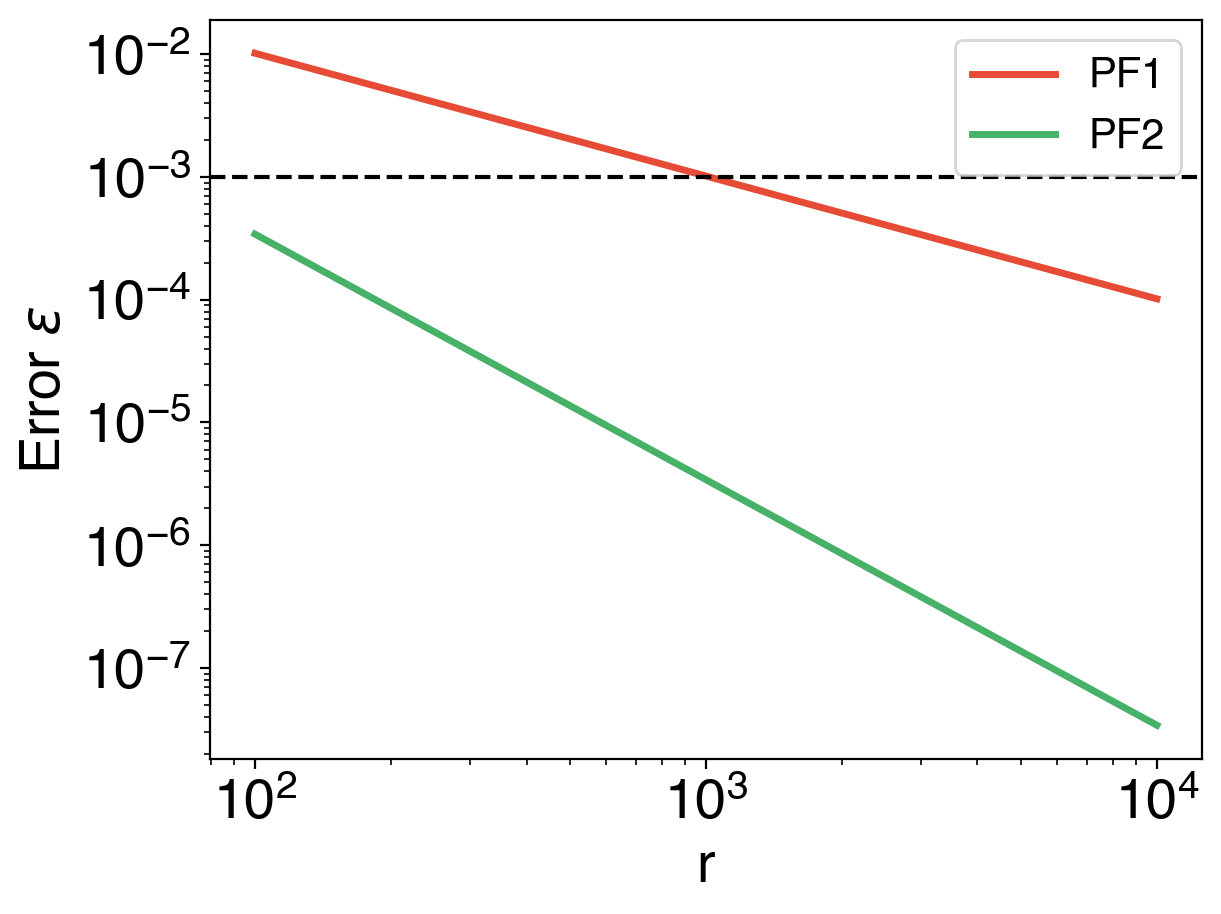

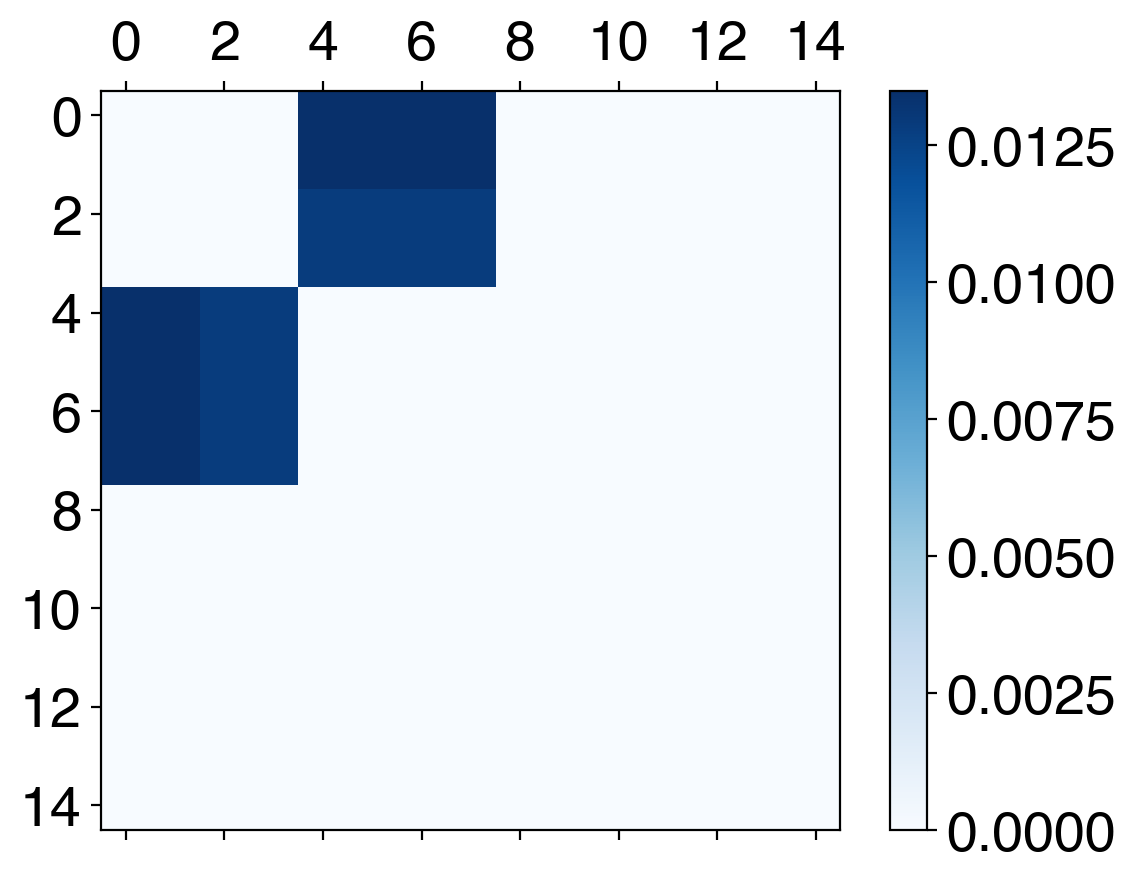

In [7]:
d = 1.0
n_hydrogen = 2
h2 = hydrogen_chain_hamiltonian(n_hydrogen, d, verbose=False)
# h2o = h2o_hamiltonian(verbose=False)
# encode_method = 'fm' # 'fm' or 'jw'
encode_method = 'jw' # 'fm' or 'jw'
Enable_random = False

if encode_method == 'jw':
    print(h2.jw)
    h_list = h2.qubit_terms
else:
    print(h2.fermion_hamiltonian)
    h_list = op2mat(h2.fermion_hamiltonian, h2.n_qubits)

# if encode_method == 'jw':
#     print(h2o.jw)
#     h_list = h2o.qubit_terms
# elif encode_method == 'fm':
#     print(h2o.fermion_hamiltonian)
#     h_list = op2mat(h2o.fermion_hamiltonian, h2o.n_qubits)

if Enable_random:
    seed_value = random.randrange(sys.maxsize)
    random.seed(seed_value)  
    h_list = random.sample(h_list, len(h_list))

new_hlist = []
index = [1, 2, 3, 4, 6, 7, 8, 9]
for i in index:
    new_hlist.append(h_list[i])
for i in range(15):
    if i not in index:
        new_hlist.append(h_list[i])


t = 10
epsilon = 1e-3
error_list_pf1, error_list_pf2 = zip(sparse_trotter_error(new_hlist, r=100, t=t), sparse_trotter_error(new_hlist, r=10000, t=t))
r_list = [100, 10000]
data_plot(r_list, error_list_pf1, '-', label='PF1', linewidth=2.5)
data_plot(r_list, error_list_pf2, '-', label='PF2', linewidth=2.5)
plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'Error $\epsilon$')
plt.legend()

# commutator_table = []
# for term in h_list:
#     temp_table = []
#     # print(term)
#     for term2 in h_list:
#         temp_table.append(np.linalg.norm(commutator(term, term2).toarray(), ord=2))
#     commutator_table.append(temp_table)

commutator_table = []
for term in new_hlist:
    temp_table = []
    # print(term)
    for term2 in new_hlist:
        temp_table.append(np.linalg.norm(commutator(term, term2).toarray(), ord=2))
    commutator_table.append(temp_table)

print(commutator_table)
# plot the commutator table 
# plt.imshow(commutator_table, cmap='hot', interpolation='nearest')
fig, ax = plt.subplots()
comm_plot = ax.matshow(commutator_table, cmap=plt.cm.Blues)
ax.grid(False)
# for i in range(15):
#     for j in range(15):
#         c = np.array(commutator_table)[j,i]
#         ax.text(i, j, str(c), va='center', ha='center')
fig.colorbar(comm_plot)
if Enable_random:
    fig.savefig(f'../figs/commu_h{n_hydrogen}_d={str(d)}_{encode_method}_L={len(h_list)}_rand.pdf', dpi=400, bbox_inches='tight')
else:
    fig.savefig(f'../figs/commu_h{n_hydrogen}_d={str(d)}_{encode_method}_L={len(h_list)}.pdf', dpi=400, bbox_inches='tight')

 (-0.3314778134168136+0j) [] +
(-0.03934551356040755+0j) [X0 X1 Y2 Y3] +
(0.010770994389681786+0j) [X0 X1 Y2 Z3 Z4 Z5 Z6 Y7] +
(0.010770994389681786+0j) [X0 X1 X3 Z4 Z5 X6] +
(-0.02695803027101892+0j) [X0 X1 Y4 Y5] +
(-0.0242673742498309+0j) [X0 X1 Y6 Y7] +
(0.03934551356040755+0j) [X0 Y1 Y2 X3] +
(-0.010770994389681786+0j) [X0 Y1 Y2 Z3 Z4 Z5 Z6 X7] +
(0.010770994389681786+0j) [X0 Y1 Y3 Z4 Z5 X6] +
(0.02695803027101892+0j) [X0 Y1 Y4 X5] +
(0.0242673742498309+0j) [X0 Y1 Y6 X7] +
(0.02450023853287261+0j) [X0 Z1 X2 X3 Z4 X5] +
(0.02450023853287261+0j) [X0 Z1 X2 Y3 Z4 Y5] +
(0.02441822802586469+0j) [X0 Z1 X2 X4 Z5 X6] +
(0.013030122213395726+0j) [X0 Z1 X2 Y4 Z5 Y6] +
(0.03765836794307973+0j) [X0 Z1 X2 X5 Z6 X7] +
(0.03765836794307973+0j) [X0 Z1 X2 Y5 Z6 Y7] +
(0.01138810581246896+0j) [X0 Z1 Y2 Y4 Z5 X6] +
(-0.024628245729684008+0j) [X0 Z1 Z2 X3 Y4 Z5 Z6 Y7] +
(-0.013240139917215047+0j) [X0 Z1 Z2 X3 X5 X6] +
(0.024628245729684008+0j) [X0 Z1 Z2 Y3 Y4 Z5 Z6 X7] +
(-0.013240139917215047+0j) [X

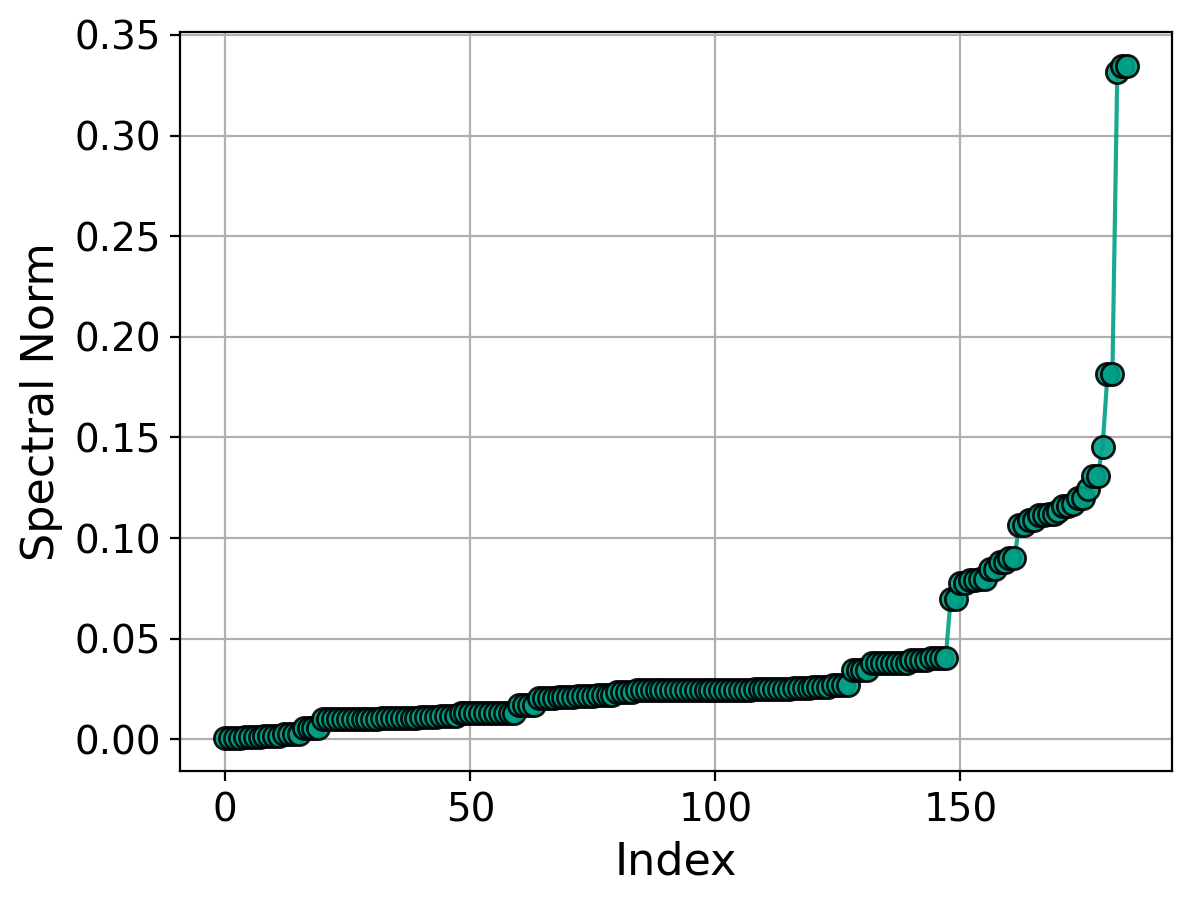

There are 0 terms with 0 spectral norm
-------sparse_trotter_error--------
-------sparse_trotter_error--------
-------sparse_trotter_error--------
-------sparse_trotter_error--------


Text(0.5, 1.0, 'H2 (Fermionic chemical), n=8, t=8, L=185')

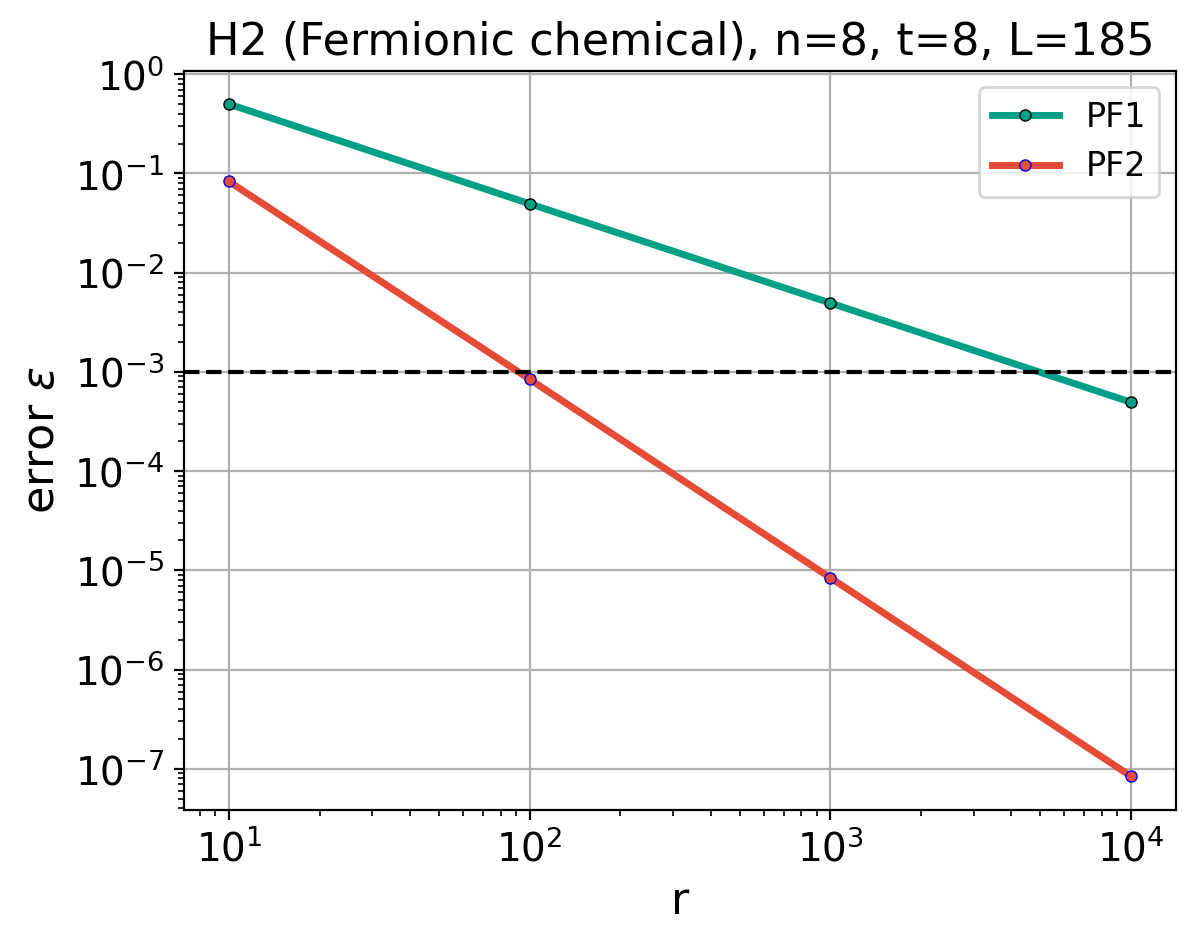

In [3]:
d = 1.0
h2 = hydrogen_chain_hamiltonian(4, d, verbose=False)
# print(h2.hamiltonian_list.shape)
print('', h2.jw)
ham_spec(h2.hamiltonian_list)

r_list = np.logspace(1, 4, num=4, dtype=int)
t = h2.n_qubits
epsilon = 1e-3
n_perm = 200

error_list = np.array([sparse_trotter_error(h2.qubit_terms, r, t) for r in r_list])
error_list_pf1 = error_list[:, 0]
error_list_pf2 = error_list[:, 1]

data_plot(r_list, error_list_pf1, '.-', label='PF1', linewidth=2.5)
data_plot(r_list, error_list_pf2, '.-', label='PF2', linewidth=2.5, markeredgecolor='b')

plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'error $\epsilon$')
plt.legend()
plt.title(f'H2 (Fermionic chemical), n={h2.n_qubits}, t={t}, L={h2.l_terms}')

 (-0.3276081896748102+0j) [] +
(-0.049197645871367546+0j) [X0 X1 Y2 Y3] +
(0.049197645871367546+0j) [X0 Y1 Y2 X3] +
(0.049197645871367546+0j) [Y0 X1 X2 Y3] +
(-0.049197645871367546+0j) [Y0 Y1 X2 X3] +
(0.13716572937099492+0j) [Z0] +
(0.15660062488237944+0j) [Z0 Z1] +
(0.10622904490856078+0j) [Z0 Z2] +
(0.15542669077992832+0j) [Z0 Z3] +
(0.13716572937099497+0j) [Z1] +
(0.15542669077992832+0j) [Z1 Z2] +
(0.10622904490856078+0j) [Z1 Z3] +
(-0.13036292057109028+0j) [Z2] +
(0.1632676867356434+0j) [Z2 Z3] +
(-0.13036292057109028+0j) [Z3]
norms:  [0.3276081896748102, 0.13716572937099492, 0.13716572937099497, 0.13036292057109028, 0.13036292057109028, 0.15660062488237944, 0.049197645871367546, 0.049197645871367546, 0.049197645871367546, 0.049197645871367546, 0.10622904490856078, 0.15542669077992832, 0.15542669077992832, 0.10622904490856078, 0.1632676867356434]
sorted norms:  [0.049197645871367546, 0.049197645871367546, 0.049197645871367546, 0.049197645871367546, 0.10622904490856078, 0.106229044

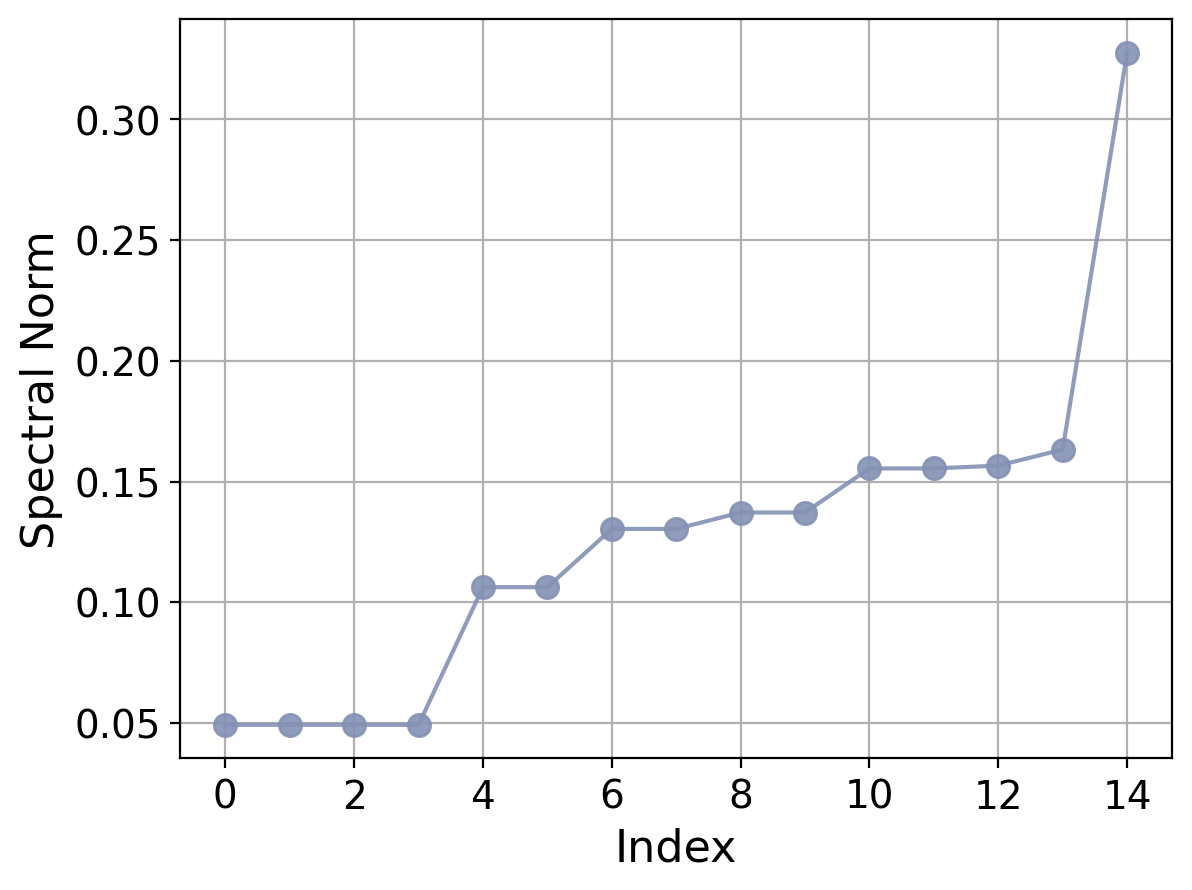

There are 0 terms with 0 spectral norm


TypeError: cal_trotter_error() got an unexpected keyword argument 'n_perm'

In [3]:
from openfermion_hamiltonians import *
from utils import *
%config InlineBackend.figure_format = 'retina'

# obtain the Hamiltonian of H2
d = 1.0
h2 = hydrogen_chain_hamiltonian(2, d, verbose=False)
# print(h2.hamiltonian_list.shape)
print('', h2.qubit_hamiltonian)
ham_spec(h2.hamiltonian_list)

r_list = np.logspace(1, 4, num=4, dtype=int)
t = h2.n_qubit
epsilon = 1e-3
n_perm = 200

error_list_pf1, error_list_pf2 = trotter_error(h2.hamiltonian_list, r_list, t, n_perm=n_perm)

data_plot(r_list, error_list_pf1[:,0], 'r-', label='PF1', linewidth=2.5)
data_plot(r_list, error_list_pf2[:,0], 'r-', label='PF2', linewidth=2.5)

for i in range(len(error_list_pf1[0])):
    # if i % 10 == 0: print(i)
    data_plot(r_list, error_list_pf1[:,i], '.:', label=' (PF1)', alpha=0.5)
    data_plot(r_list, error_list_pf2[:,i], '.:', label=' (PF2)', alpha=0.5)

plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'error $\epsilon$')
plt.title(f'H2 (Fermionic chemical), n={h2.n_qubit}, t={t}, L={h2.l_terms}, n_perm={n_perm}')
plt.savefig(f'../figs/h2_jw_{n_perm}_{d}.pdf', dpi=300, bbox_inches='tight')

In [2]:
# print('--------------OpenFermionPySCF--------------')
d = 1.0
geometry = [['H', [0, 0, 0]], ['H', [0, 0, d]]]
basis = 'sto-3g'; multiplicity = 1; charge = 0
molecule = MolecularData(geometry, basis, multiplicity, charge)

molecule.load()
molecular_hamiltonian = molecule.get_molecular_hamiltonian() # no constant (nuclear repulsion)
print('molecular_hamiltonian: \n', molecular_hamiltonian)
hamiltonian_ferm_op = get_fermion_operator(molecular_hamiltonian)
print('hamiltonian_ferm_op: \n', hamiltonian_ferm_op)
# for i, (k, v) in enumerate(molecular_hamiltonian.items()):
#     print(i, k, v)

def tuples_to_lists(tuples):
    return [list(t) for t in tuples]

lex_fop_list = []
one_fop_list = []
two_fop_list = []
h_pp = []
h_pqqp = []
h_pq = []
h_prrq = []
h_pqrs = []
for term in hamiltonian_ferm_op:
    print(f'term: {term}')
    # print(term.terms)
    sparse_temp = get_sparse_operator(term, n_qubits=4)
    for i, (k, v) in enumerate(term.terms.items()):
        # print(i, k, v)
        temp_list = tuples_to_lists(k)
        print(temp_list)
        if len(temp_list) ==0:
            h_pp.append(term)
            one_fop_list.append(sparse_temp)
        elif len(temp_list) == 2:
            one_fop_list.append(sparse_temp)
            if temp_list[0][0] == temp_list[1][0]:
                h_pp.append(term)
            else:
                h_pq.append(term)
            # print(temp_list[0][0], temp_list[1][0])
        elif len(temp_list) == 4:
            two_fop_list.append(sparse_temp)
            if temp_list[1][0] == temp_list[2][0]:
                if temp_list[0][0] == temp_list[3][0]:
                    h_pqqp.append(term)
                else:
                    h_prrq.append(term)
            else:
                h_pqrs.append(term)
        else:
            raise ValueError('term length not 0, 2, or 4')
    print(f'sparse term: \n {sparse_temp}')
    lex_fop_list.append(sparse_temp)
    # print(temp.shape[0])
print(h_pp + h_pqqp + h_pq + h_prrq + h_pqrs)
int_fop_list = [get_sparse_operator(item, n_qubits=4) for item in h_pp + h_pqqp + h_pq + h_prrq + h_pqrs]
default_fop_list = one_fop_list + two_fop_list

try: 
    assert len(hamiltonian_ferm_op.terms) == len(h_pp + h_pqqp + h_pq + h_prrq + h_pqrs) == len(default_fop_list)
except AssertionError:
    print('len(hamiltonian_ferm_op.terms): ', len(hamiltonian_ferm_op.terms))
    print('len(h_pp + h_pqqp + h_pq + h_prrq + h_pqrs): ', len(h_pp + h_pqqp + h_pq + h_prrq + h_pqrs))
    print('len(default_fop_list): ', len(default_fop_list))
    raise AssertionError('len(hamiltonian_ferm_op.terms) != len(h_pp + h_pqqp + h_pq + h_prrq + h_pqrs) != len(default_fop_list)')
# print(hamiltonian_ferm_op)
# print(h_pp + h_pqqp + h_pq + h_prrq + h_pqrs)

molecular_hamiltonian: 
 () 0.66147151365
((0, 1), (0, 0)) -1.2178260299951063
((1, 1), (1, 0)) -1.2178260299951063
((2, 1), (2, 0)) -0.5096378744364837
((3, 1), (3, 0)) -0.5096378744364837
((0, 1), (0, 1), (0, 0), (0, 0)) 0.33166507443180837
((0, 1), (0, 1), (2, 0), (2, 0)) 0.0923133917780305
((0, 1), (1, 1), (1, 0), (0, 0)) 0.33166507443180837
((0, 1), (1, 1), (3, 0), (2, 0)) 0.0923133917780305
((0, 1), (2, 1), (0, 0), (2, 0)) 0.0923133917780305
((0, 1), (2, 1), (2, 0), (0, 0)) 0.3267206861819478
((0, 1), (3, 1), (1, 0), (2, 0)) 0.0923133917780305
((0, 1), (3, 1), (3, 0), (0, 0)) 0.3267206861819478
((1, 1), (0, 1), (0, 0), (1, 0)) 0.33166507443180837
((1, 1), (0, 1), (2, 0), (3, 0)) 0.0923133917780305
((1, 1), (1, 1), (1, 0), (1, 0)) 0.33166507443180837
((1, 1), (1, 1), (3, 0), (3, 0)) 0.0923133917780305
((1, 1), (2, 1), (0, 0), (3, 0)) 0.0923133917780305
((1, 1), (2, 1), (2, 0), (1, 0)) 0.3267206861819478
((1, 1), (3, 1), (1, 0), (3, 0)) 0.0923133917780305
((1, 1), (3, 1), (3, 0), (

number of terms:  37
# randomly selected perm:  50
number of terms:  37
# randomly selected perm:  50
number of terms:  37
# randomly selected perm:  50


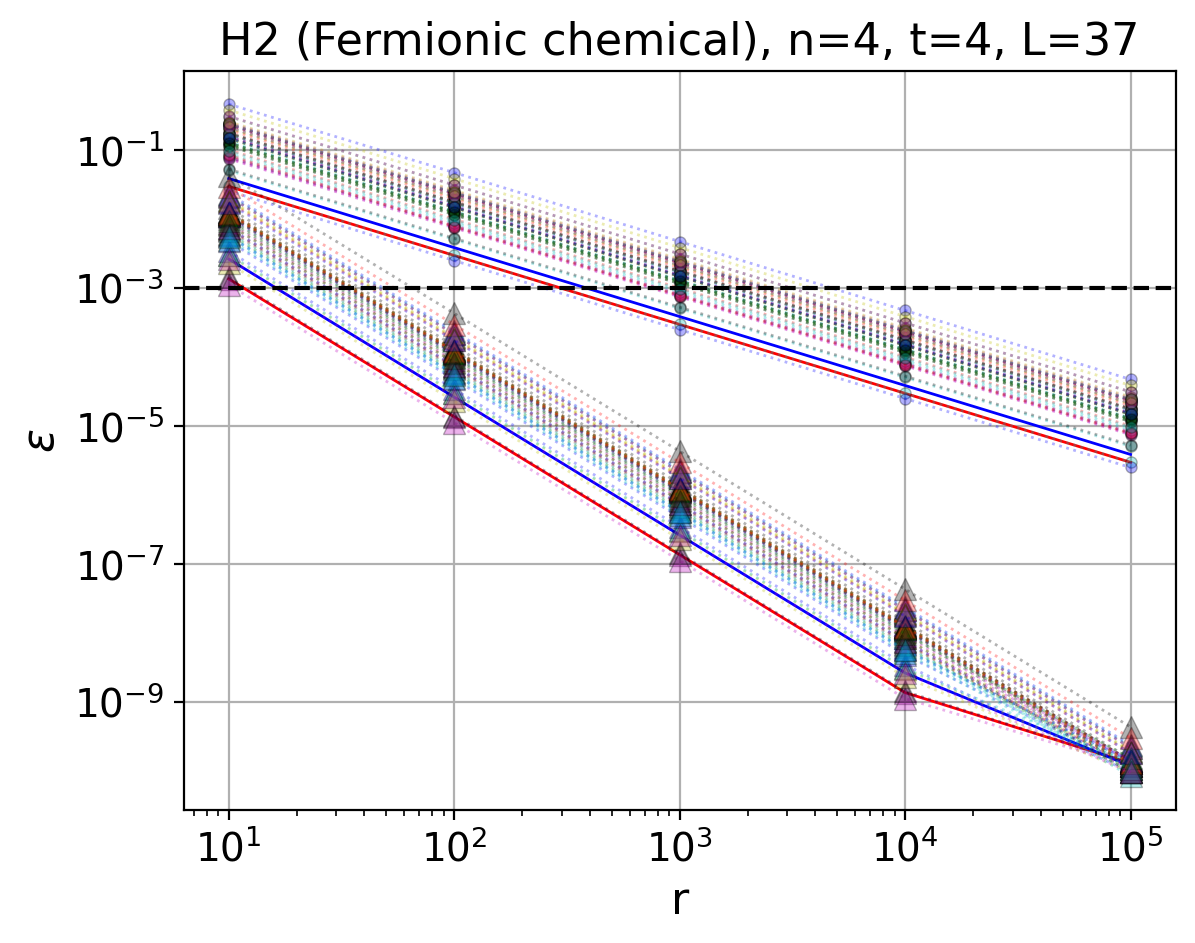

In [5]:
# test_fop_list = [FermionOperator('0^ 7^ 1 2', -0.02070), FermionOperator('2^ 1^ 7 4', 0.02929), FermionOperator('3^ 1^ 5 7', 0.05063), FermionOperator('4^ 0^ 6 2', 0.02929)]
n_qubit = 4
t = n_qubit
epsilon = 1e-3
# ham_list = [get_sparse_operator(item, n_qubits=n_qubit).toarray() for item in test_fop_list]
lex_ham_list = [item.toarray() for item in lex_fop_list]
int_ham_list = [item.toarray() for item in int_fop_list]
def_ham_list = [item.toarray() for item in default_fop_list]
l = len(lex_fop_list)
# for item in test_fop_list:
#     print('H: \n', get_sparse_operator(item, n_qubits=8))
r_list = np.logspace(1, 5, num=5, dtype=int)
t = n_qubit

lex_trotter_error_list, lex_trotter_error_list_2nd = trotter_error(lex_ham_list, r_list, t)
int_trotter_error_list, int_trotter_error_list_2nd = trotter_error(int_ham_list, r_list, t)
def_trotter_error_list, def_trotter_error_list_2nd = trotter_error(def_ham_list, r_list, t)
# print(len(perm_list))
# print(trotter_error_list)
data_plot(r_list, lex_trotter_error_list[:,0], 'r-', label=' (PF1)')
data_plot(r_list, lex_trotter_error_list_2nd[:,0], 'r-', label=' (PF2)')

data_plot(r_list, int_trotter_error_list[:,0], 'b-', label=' (PF1)')
data_plot(r_list, int_trotter_error_list_2nd[:,0], 'b-', label=' (PF2)')

# utils.data_plot(r_list, def_trotter_error_list[:,0], 'g-', label=' (PF1)')
# utils.data_plot(r_list, def_trotter_error_list_2nd[:,0], 'g-', label=' (PF2)')

for i in range(len(lex_trotter_error_list[0])):
    # if i % 10 == 0: print(i)
    data_plot(r_list, lex_trotter_error_list[:,i], '.:', label=' (1st)', alpha=0.3)

for i in range(len(lex_trotter_error_list_2nd[0])):
    # if i % 10 == 0: print(i)
    data_plot(r_list, lex_trotter_error_list_2nd[:,i], '^:', label=' (1st)', alpha=0.3)

plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'$\epsilon$')
plt.title(f'H2 (Fermionic chemical), n={n_qubit}, t={t}, L={l}')
plt.savefig(f'../figs/h2_fermion.pdf', dpi=300, bbox_inches='tight')

## Openfermion simulate_trotter

In [26]:
import openfermionpyscf as ofpyscf
import openfermion as of
import numpy as np
from scipy.sparse import linalg
import cirq

from openfermion_hamiltonians import *
from utils import *

# Set molecule parameters
use_ActiveSpace = True
d = 1.0
angle = 104.5
x1 = d*np.sin(np.pi*angle/360)
x2 = -d*np.sin(np.pi*angle/360)
z = d*np.cos(np.pi*angle/360)
geometry = [("H", (x1, 0.0, z)), ("O", (0.0, 0.0, 0.0)), ("H", (x2, 0.0, z))]
occupied_indices = [0,1]
active_indices = [2,3,4,5,6]
basis = "sto-3g"
multiplicity = 1
charge = 0

# Perform electronic structure calculations and
# obtain Hamiltonian as an InteractionOperator
molecule = MolecularData(geometry, basis, multiplicity, charge)
molecule.load()

if use_ActiveSpace:
    print('=====Using active space=====')
    molecular_hamiltonian = molecule.get_molecular_hamiltonian(
        occupied_indices=occupied_indices,
        active_indices=active_indices)
else:
    molecular_hamiltonian = ofpyscf.generate_molecular_hamiltonian(
        geometry, basis, multiplicity, charge
    )

# Convert to a FermionOperator
fermion_hamiltonian = of.get_fermion_operator(molecular_hamiltonian)
# print(fermion_hamiltonian)

# Convert to a QubitOperator
qubit_hamiltonian = jordan_wigner(fermion_hamiltonian)
qubit_hamiltonian.compress()
print(f'number of terms: {len(list(qubit_hamiltonian))}')
print('The Jordan-Wigner Hamiltonian in canonical basis follows:\n{}'.format(qubit_hamiltonian))

r_list = np.logspace(1, 4, num=4, dtype=int)
h2o_hamiltonian = openfermion_matrix_list(qubit_hamiltonian)
t = 10
epsilon = 1e-3
n_perm = 2

error_list_pf1, error_list_pf2 = trotter_error(h2o_hamiltonian, r_list, t, n_perm=n_perm)

data_plot(r_list, error_list_pf1[:,0], 'r-', label='PF1', linewidth=2.5)
data_plot(r_list, error_list_pf2[:,0], 'r-', label='PF2', linewidth=2.5)

for i in range(len(error_list_pf1[0])):
    # if i % 10 == 0: print(i)
    data_plot(r_list, error_list_pf1[:,i], '.:', label=' (PF1)', alpha=0.5)
    data_plot(r_list, error_list_pf2[:,i], '.:', label=' (PF2)', alpha=0.5)

plt.axhline(y=epsilon, c='k', linestyle='--', linewidth=1.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('r')
plt.ylabel(r'error $\epsilon$')
plt.title(f'H2 (Fermionic chemical), n={t}, t={t}, L={len(h2o_hamiltonian)}, n_perm={n_perm}')
plt.savefig(f'../figs/h2o_jw_{n_perm}_{d}.pdf', dpi=300, bbox_inches='tight')

=====Using active space=====
number of terms: 252
The Jordan-Wigner Hamiltonian in canonical basis follows:
-72.34512654398662 [] +
-0.012340477602697771 [X0 X1 Y2 Y3] +
0.007860524644432708 [X0 X1 Y2 Z3 Z4 Z5 Z6 Y7] +
0.007860524644432708 [X0 X1 X3 Z4 Z5 X6] +
-0.007003017393163209 [X0 X1 Y4 Y5] +
-0.018110462919472717 [X0 X1 Y6 Y7] +
-0.03860855905511192 [X0 X1 Y8 Y9] +
0.012340477602697771 [X0 Y1 Y2 X3] +
-0.007860524644432708 [X0 Y1 Y2 Z3 Z4 Z5 Z6 X7] +
0.007860524644432708 [X0 Y1 Y3 Z4 Z5 X6] +
0.007003017393163209 [X0 Y1 Y4 X5] +
0.018110462919472717 [X0 Y1 Y6 X7] +
0.03860855905511192 [X0 Y1 Y8 X9] +
-0.0005595190232045993 [X0 Z1 X2 X3 Z4 Z5 Z6 Z7 Z8 X9] +
-0.0005595190232045993 [X0 Z1 X2 Y3 Z4 Z5 Z6 Z7 Z8 Y9] +
-0.008207023828702502 [X0 Z1 X2 X6 Z7 X8] +
0.0011576598990098337 [X0 Z1 X2 Y6 Z7 Y8] +
0.013037222105537684 [X0 Z1 X2 X7 Z8 X9] +
0.013037222105537684 [X0 Z1 X2 Y7 Z8 Y9] +
-0.009364683727712335 [X0 Z1 Y2 Y6 Z7 X8] +
-0.01187956220652785 [X0 Z1 Z2 X3 Y6 Z7 Z8 Y9] +
-0.0

KeyboardInterrupt: 

In [1]:
import openfermionpyscf as ofpyscf
import openfermion as of
import numpy as np
from scipy.sparse import linalg
import cirq

# Set molecule parameters
geometry = [("H", (0.0, 0.0, 0.0)), ("H", (0.0, 0.0, 0.8))]
basis = "sto-3g"
multiplicity = 1
charge = 0

# Perform electronic structure calculations and
# obtain Hamiltonian as an InteractionOperator
hamiltonian = ofpyscf.generate_molecular_hamiltonian(
    geometry, basis, multiplicity, charge
)
# for term in hamiltonian:
#     print(term, hamiltonian[term])
# print(hamiltonian)
# print(hamiltonian.terms)

# Convert to a FermionOperator
hamiltonian_ferm_op = of.get_fermion_operator(hamiltonian)
print(hamiltonian_ferm_op)
for term in hamiltonian_ferm_op:
    print('term: \n', of.get_sparse_operator(term))
# print(hamiltonian_ferm_op)

# Map to QubitOperator using the JWT
hamiltonian_jw = of.jordan_wigner(hamiltonian_ferm_op)

# Convert to Scipy sparse matrix
hamiltonian_jw_sparse = of.get_sparse_operator(hamiltonian_jw)

# Compute ground energy
eigs, _ = linalg.eigsh(hamiltonian_jw_sparse, k=1, which="SA")
ground_energy = eigs[0]

print("Ground_energy: {}".format(ground_energy))
print("JWT transformed Hamiltonian:")
print(hamiltonian_jw)

# Map to QubitOperator using the JWT
hamiltonian_bk = of.bravyi_kitaev(hamiltonian_ferm_op)

# Convert to Scipy sparse matrix
hamiltonian_bk_sparse = of.get_sparse_operator(hamiltonian_bk)

# Compute ground energy
eigs, _ = linalg.eigsh(hamiltonian_bk_sparse, k=1, which="SA")
ground_energy = eigs[0]

# print("Ground_energy: {}".format(ground_energy))
# print("BK transformed Hamiltonian:")
# print(hamiltonian_bk)


0.66147151365 [] +
-1.2178260299951063 [0^ 0] +
0.33166507443180837 [0^ 0^ 0 0] +
0.0923133917780305 [0^ 0^ 2 2] +
0.33166507443180837 [0^ 1^ 1 0] +
0.0923133917780305 [0^ 1^ 3 2] +
0.0923133917780305 [0^ 2^ 0 2] +
0.3267206861819478 [0^ 2^ 2 0] +
0.0923133917780305 [0^ 3^ 1 2] +
0.3267206861819478 [0^ 3^ 3 0] +
0.33166507443180837 [1^ 0^ 0 1] +
0.0923133917780305 [1^ 0^ 2 3] +
-1.2178260299951063 [1^ 1] +
0.33166507443180837 [1^ 1^ 1 1] +
0.0923133917780305 [1^ 1^ 3 3] +
0.0923133917780305 [1^ 2^ 0 3] +
0.3267206861819478 [1^ 2^ 2 1] +
0.0923133917780305 [1^ 3^ 1 3] +
0.3267206861819478 [1^ 3^ 3 1] +
0.32672068618194805 [2^ 0^ 0 2] +
0.0923133917780305 [2^ 0^ 2 0] +
0.32672068618194805 [2^ 1^ 1 2] +
0.0923133917780305 [2^ 1^ 3 0] +
-0.5096378744364837 [2^ 2] +
0.0923133917780305 [2^ 2^ 0 0] +
0.3433957678457352 [2^ 2^ 2 2] +
0.0923133917780305 [2^ 3^ 1 0] +
0.3433957678457352 [2^ 3^ 3 2] +
0.32672068618194805 [3^ 0^ 0 3] +
0.0923133917780305 [3^ 0^ 2 1] +
0.32672068618194805 [3^ 1^ 1 

In [36]:
# https://quantumai.google/openfermion/tutorials/intro_workshop_exercises

# Create a random initial state
n_qubits = of.count_qubits(hamiltonian)
initial_state = of.haar_random_vector(2**n_qubits, seed=7)

# Set evolution time
time = 1.0

# Apply exp(-i H t) to the state
exact_state = linalg.expm_multiply(-1j * hamiltonian_jw_sparse * time, initial_state)

# Initialize qubits
qubits = cirq.LineQubit.range(n_qubits)

# Create circuit
circuit = cirq.Circuit(
    of.simulate_trotter(
        qubits, hamiltonian, time, n_steps=10, order=0, algorithm=of.LOW_RANK
    )
)

# Apply the circuit to the initial state
result = circuit.final_state_vector(initial_state)

# Compute the fidelity with the final state from exact evolution
fidelity = abs(np.dot(exact_state, result.conj())) ** 2

print(fidelity)
print(circuit.to_text_diagram(transpose=True))


TypeError: AbstractCircuit.final_state_vector() takes 1 positional argument but 2 were given